# Import Dependencies

In [2]:
from sklearn import datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import dump, load

# Iris Models

### Get Data

In [25]:
iris_data = datasets.load_iris()

# Get pre-existing feature and target data from dataset
features = iris_data['data']
targets = iris_data['target']

# Convert to pandas dataframe
iris = pd.DataFrame(data= np.c_[iris_data['data'], iris_data['target']],
                     columns= ['sepallen', 'sepalwid', 'petallen', 'petalwid', 'species'])

iris

,sepallen,sepalwid,petallen,petalwid,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [26]:
# Add iris names
mapping = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

iris['irisname'] = iris['species'].map(mapping)

iris

,sepallen,sepalwid,petallen,petalwid,species,irisname
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,virginica
146,6.3,2.5,5.0,1.9,2.0,virginica
147,6.5,3.0,5.2,2.0,2.0,virginica
148,6.2,3.4,5.4,2.3,2.0,virginica


In [27]:
# Create dummies
iris_cat = pd.get_dummies(data=iris, prefix="is", columns=["irisname"])
iris_cat = iris_cat.drop("species", axis=1)

iris_cat

,sepallen,sepalwid,petallen,petalwid,is_setosa,is_versicolor,is_virginica
0,5.1,3.5,1.4,0.2,True,False,False
1,4.9,3.0,1.4,0.2,True,False,False
2,4.7,3.2,1.3,0.2,True,False,False
3,4.6,3.1,1.5,0.2,True,False,False
4,5.0,3.6,1.4,0.2,True,False,False
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,False,False,True
146,6.3,2.5,5.0,1.9,False,False,True
147,6.5,3.0,5.2,2.0,False,False,True
148,6.2,3.4,5.4,2.3,False,False,True


In [28]:
# Define feature/target data with dummies
A = iris_cat.to_numpy()
A = A.astype('float64')

features = A[:,0:4]
targets = A[:,4:]

print(features)
print(targets)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [29]:
# Keep track of species index
SPECIES = ['setosa','versicolor','virginica']   # int to str
SPECIES_INDEX = {'setosa':0,'versicolor':1,'virginica':2}  # str to int

FEATURES = ['sepallen', 'sepalwid', 'petallen', 'petalwid']
FEATURES_INDEX = {'sepallen':0,'sepalwid':1,'petallen':2,'petalwid':3}

### Training the KNN Model

In [30]:
# Permute data to remove dependence on order
indices = np.random.permutation(len(targets))
features = features[indices]
targets = targets[indices]

In [ ]:
# Train model
from sklearn.neighbors import KNeighborsClassifier
from classifier.iris.model_loader import BEST_K

knn = KNeighborsClassifier(n_neighbors=BEST_K)
knn.fit(features, targets)

In [ ]:
# Save Model
dump(knn, 'classifier/models/iris/knn.pkl')

### Creating Plots for KNN Visualization

In [ ]:
knn = load('classifier/models/iris/knn.pkl')

##### Sepal Plane

In [ ]:
# Get averages to serve as the plane
# SEPALLEN = iris['sepallen'].mean()
# SEPALWID = iris['sepalwid'].mean()

# With corrections
SEPALLEN = 5.84
SEPALWID = 3.06

In [ ]:
# Create plane
VERTICAL = np.arange(0,8,.1) # array of vertical input values
HORIZONT = np.arange(0,8,.1) # array of horizontal input values
PLANE = np.zeros( (len(HORIZONT),len(VERTICAL)) ) # the output array
MODEL = knn

col = 0
row = 0
for petalwid in VERTICAL: # for every sepal length
  for petallen in HORIZONT: # for every sepal width
    Features = [ SEPALLEN, SEPALWID, petallen, petalwid ]
    output = MODEL.predict([Features])
    PLANE[row,col] = int(round(output[0]))
    row += 1
  row = 0
  col += 1

print("\n", PLANE) # small bit of the lower-left corner

In [ ]:
# Create heatmap
sns.set(rc = {'figure.figsize':(12,8)})  # figure size!
ax = sns.heatmap(PLANE, cbar_kws={'ticks': [0, 1, 2]})
ax.invert_yaxis() # to match our usual direction
ax.set(xlabel="Petal Width (mm)", ylabel="Petal Length (mm)")
ax.set_title(f"Model Predictions with the Average Sepal Length ({SEPALLEN:.2f} cm) and Sepal Width ({SEPALWID:.2f} cm)")
ax.set_xticks(ax.get_xticks()[::4])
ax.set_yticks(ax.get_yticks()[::4])


# Modify color bar
cbar = ax.collections[0].colorbar # Get color bar from heatmap
cbar.set_label('Species', labelpad=-95)  # Set the label for the color bar
cbar.set_ticklabels(['setosa', 'versicolor', 'virginica'])  # Set the tick labels

In [ ]:
# Save
fig = ax.get_figure().savefig("classifier/static/img/iris_knn_sepal.png")

##### Petal Plane

In [ ]:
# Get averages to serve as the plane
# PETALLEN = iris['petallen'].mean()
# PETALWID = iris['petalwid'].mean()

# With corrections
PETALLEN = 3.78
PETALWID = 3.03

In [ ]:
# Create plan
VERTICAL = np.arange(0,8,.1) # array of vertical input values
HORIZONT = np.arange(0,8,.1) # array of horizontal input values
PLANE = np.zeros( (len(HORIZONT),len(VERTICAL)) ) # the output array
MODEL = knn

col = 0
row = 0
for sepalwid in VERTICAL: # for every sepal length
  for sepallen in HORIZONT: # for every sepal width
    Features = [ sepallen, sepalwid, PETALLEN, PETALWID ]
    output = MODEL.predict([Features])
    PLANE[row,col] = int(round(output[0]))
    row += 1
  row = 0
  col += 1

print("\n", PLANE) # small bit of the lower-left corner

In [ ]:
# Create heatmap
sns.set(rc = {'figure.figsize':(12,8)})  # figure size!
ax = sns.heatmap(PLANE, cbar_kws={'ticks': [0, 1, 2]})
ax.invert_yaxis() # to match our usual direction
ax.set(xlabel="Sepal Width (mm)", ylabel="Sepal Length (mm)")
ax.set_title(f"Model Predictions with the Average Petal Length ({PETALLEN:.2f} cm) and Petal Width ({PETALWID:.2f} cm)")
ax.set_xticks(ax.get_xticks()[::4])
ax.set_yticks(ax.get_yticks()[::4])


# Modify color bar
cbar = ax.collections[0].colorbar # Get color bar from heatmap
cbar.set_label('Species', labelpad=-95)  # Set the label for the color bar
cbar.set_ticklabels(['setosa', 'versicolor', 'virginica'])  # Set the tick labels

In [ ]:
# Save
fig = ax.get_figure().savefig("classifier/static/img/iris_knn_petal.png")

### Training the DTree Model

In [5]:
# Permute data to remove dependence on order
indices = np.random.permutation(len(targets))
features = features[indices]
targets = targets[indices]

In [10]:
from sklearn import tree
BEST_DEPTH = 3 # from previous cross validation

dtree = tree.DecisionTreeClassifier(max_depth=BEST_DEPTH)
dtree.fit(features, targets)

DecisionTreeClassifier(max_depth=3)

In [11]:
# Feature importances
print(dtree.feature_importances_)

[0.         0.         0.05393633 0.94606367]


In [35]:
# Save model
dump(dtree, 'classifier/models/iris/dtree.pkl')

['classifier/models/iris/dtree.pkl']

### Visualizing the dtree model

In [36]:
dtree = load('classifier/models/iris/dtree.pkl')

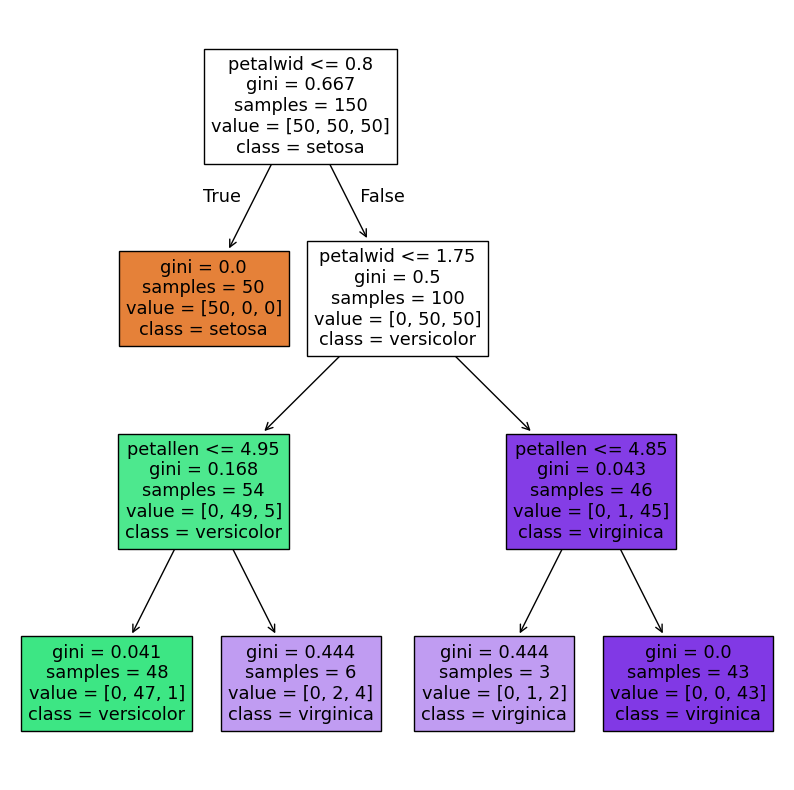

In [37]:
fig = plt.figure(figsize=(10,10))
tree_plot = tree.plot_tree(dtree, 
                   feature_names=FEATURES,
                   class_names=SPECIES,
                   filled=True)

In [38]:
# Save figure
fig.savefig("classifier/static/img/iris_dtree.png", bbox_inches='tight')

### Training a Multi-layer Perceptron

In [74]:
# Permute data to remove dependency on order
indices = np.random.permutation(len(targets))
features = features[indices]
targets = targets[indices]

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2)

In [79]:
# Scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)  # Scale with the training data! ave becomes 0; stdev becomes 1
scaler.fit(X_test)

features_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [80]:
# Train MLP
from sklearn.neural_network import MLPClassifier

# Same settings as model in CS35 hw7
nn_classifier = MLPClassifier(hidden_layer_sizes=(6,7),  
                    # hidden_layer_sizes=(6,7)   means   4 inputs -> 6 hidden -> 7 hidden -> 3 outputs
                    max_iter=500,      # how many times to train
                    # activation="tanh", # the "activation function" input -> output
                    # solver='sgd',      # the algorithm for optimizing weights
                    verbose=True,      # False to "mute" the training
                    shuffle=True,      # reshuffle the training epochs?
                    random_state=42, # set for reproduceability
                    learning_rate_init=.1,       # learning rate: the amt of error to backpropagate!
                    learning_rate = 'adaptive')  # soften feedback as it converges

nn_classifier.fit(features_scaled, y_train)

Iteration 1, loss = 2.30619621
Iteration 2, loss = 1.83157161
Iteration 3, loss = 1.68038807
Iteration 4, loss = 1.50888528
Iteration 5, loss = 1.33778856
Iteration 6, loss = 1.24353793
Iteration 7, loss = 1.19384823
Iteration 8, loss = 1.14905094
Iteration 9, loss = 1.10916736
Iteration 10, loss = 1.07636362
Iteration 11, loss = 1.05157167
Iteration 12, loss = 1.03357219
Iteration 13, loss = 1.02057584
Iteration 14, loss = 1.01158717
Iteration 15, loss = 1.00621772
Iteration 16, loss = 1.00081067
Iteration 17, loss = 0.99432254
Iteration 18, loss = 0.98735738
Iteration 19, loss = 0.97807852
Iteration 20, loss = 0.96474751
Iteration 21, loss = 0.94572813
Iteration 22, loss = 0.91992168
Iteration 23, loss = 0.88646402
Iteration 24, loss = 0.85475709
Iteration 25, loss = 0.82558160
Iteration 26, loss = 0.79905594
Iteration 27, loss = 0.77522821
Iteration 28, loss = 0.75420609
Iteration 29, loss = 0.73366297
Iteration 30, loss = 0.71410396
Iteration 31, loss = 0.69075440
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(6, 7), learning_rate='adaptive',
              learning_rate_init=0.1, max_iter=500, random_state=42,
              verbose=True)

In [81]:
# Test!
def get_species(A):
    """ returns the species for A ~ [1 0 0] or [0 1 0] or ... """
    for i in range(len(SPECIES)):
        if A[i] == 1: 
            return SPECIES[i]  # note that this "takes the first one"
    return "no species" 

SEE_PROBS = False

def ascii_table_for_classifier(Xsc,y,nn,scaler):
    """ a table including predictions using nn.predict """
    predictions = nn.predict(Xsc)            # all predictions
    prediction_probs = nn.predict_proba(Xsc) # all prediction probabilities
    Xpr = scaler.inverse_transform(Xsc)      # Xpr is the "X to print": the unscaled data
    # count correct
    num_correct = 0
    # printing
    print(f"{'input ':>28s} -> {'pred':^12s} {'des.':^12s}") 
    for i in range(len(y)):
        pred = predictions[i]
        pred_probs = str(prediction_probs[i,:])
        desired = y[i].astype(int)
        # print(pred, desired, pred_probs)
        pred_species = get_species(pred)
        des_species  = get_species(desired)
        if pred_species != des_species: result = "  incorrect: " + pred_probs
        else: result = "  correct" + (": "+pred_probs if SEE_PROBS else "") ; num_correct += 1
        # Xpr = Xsc  # if you want to see the scaled versions
        print(f"{Xpr[i,0:4]!s:>28s} -> {pred_species:^12s} {des_species:12s} {result:^10s}") 
    print(f"\ncorrect predictions: {num_correct} out of {len(y)}")
    
#
# let's see how it did on the test data (also the training data!)
#
ascii_table_for_classifier(X_test_scaled,
                           y_test,
                           nn_classifier,
                           scaler)

                      input  ->     pred         des.    
           [5.8 2.7 5.1 1.9] ->  virginica   virginica      correct 
           [6.8 3.2 5.9 2.3] ->  virginica   virginica      correct 
           [7.9 3.8 6.4 2. ] ->  virginica   virginica      correct 
           [6.5 3.2 5.1 2. ] ->  virginica   virginica      correct 
           [5.1 3.8 1.9 0.4] ->    setosa    setosa         correct 
           [6.7 3.  5.  1.7] ->  virginica   versicolor     incorrect: [2.70366145e-05 4.36808828e-01 5.66739239e-01]
           [7.4 2.8 6.1 1.9] ->  virginica   virginica      correct 
           [4.8 3.4 1.9 0.2] ->    setosa    setosa         correct 
           [7.2 3.2 6.  1.8] ->  virginica   virginica      correct 
           [5.8 4.  1.2 0.2] ->    setosa    setosa         correct 
           [5.8 2.7 5.1 1.9] ->  virginica   virginica      correct 
           [5.8 2.7 3.9 1.2] ->  versicolor  versicolor     correct 
           [5.  3.6 1.4 0.2] ->    setosa    setosa         corre

In [82]:
dump(nn_classifier, 'classifier/models/iris/mlp.pkl')

['classifier/models/iris/mlp.pkl']

### Visualizing the MLP

In [83]:
from joblib import load

mlp = load('classifier/models/iris/mlp.pkl')

##### Sepal Plane

In [86]:
# Get averages to serve as the plane
SEPALLEN = iris['sepallen'].mean()
SEPALWID = iris['sepalwid'].mean()

3.0573333333333337

In [90]:
# Create plane
VERTICAL = np.arange(0,8,.1) # array of vertical input values
HORIZONT = np.arange(0,8,.1) # array of horizontal input values
PLANE = np.zeros( (len(HORIZONT),len(VERTICAL)) ) # the output array
MODEL = mlp

col = 0
row = 0
for petalwid in VERTICAL: # for every sepal length
  for petallen in HORIZONT: # for every sepal width
    Features = [ SEPALLEN, SEPALWID, petallen, petalwid ]
    output = MODEL.predict([Features])
    for i in range(len(output[0])): # get predicted species from array
        if output[0][i] == 1:
            PLANE[row,col] = i
    row += 1
  row = 0
  col += 1

print("\n", PLANE) # small bit of the lower-left corner


 [[1. 1. 1. ... 2. 2. 2.]
 [1. 1. 1. ... 2. 2. 2.]
 [1. 1. 1. ... 2. 2. 2.]
 ...
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]]


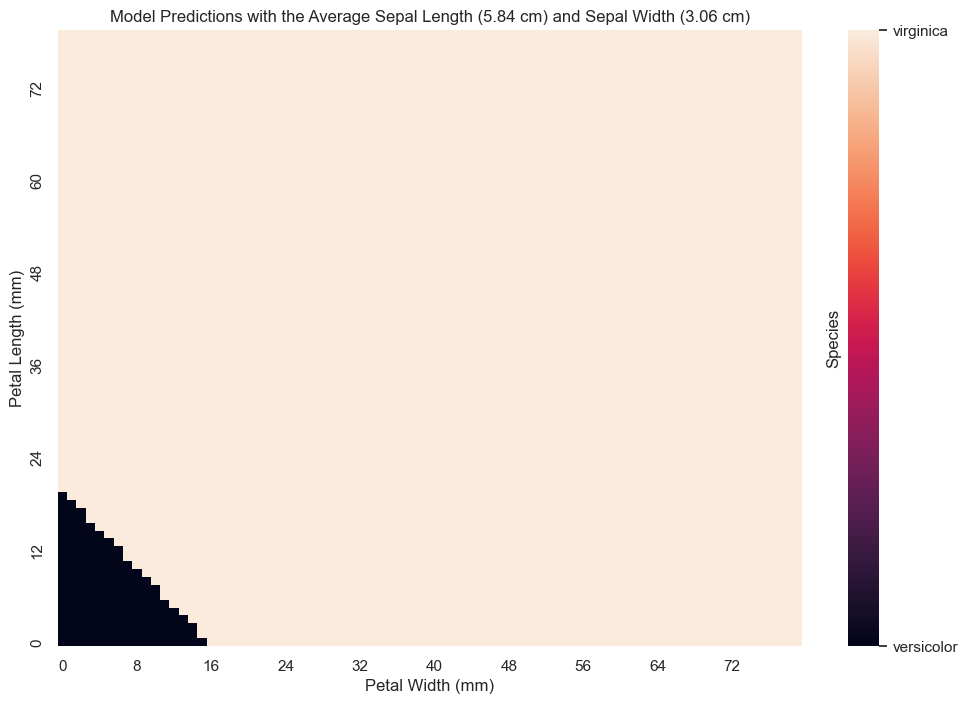

In [92]:
# Create heatmap
sns.set(rc = {'figure.figsize':(12,8)})  # figure size!
ax = sns.heatmap(PLANE, cbar_kws={'ticks': [0, 1, 2]})
ax.invert_yaxis() # to match our usual direction
ax.set(xlabel="Petal Width (mm)", ylabel="Petal Length (mm)")
ax.set_title(f"Model Predictions with the Average Sepal Length ({SEPALLEN:.2f} cm) and Sepal Width ({SEPALWID:.2f} cm)")
ax.set_xticks(ax.get_xticks()[::4])
ax.set_yticks(ax.get_yticks()[::4])


# Modify color bar
cbar = ax.collections[0].colorbar # Get color bar from heatmap
cbar.set_label('Species', labelpad=-95)  # Set the label for the color bar
cbar.set_ticklabels(['setosa', 'versicolor', 'virginica'])  # Set the tick labels

In [93]:
# Save
fig = ax.get_figure().savefig("classifier/static/img/iris_mlp_sepal.png")

##### Petal Plane

In [96]:
# Get averages to serve as the plane
PETALLEN = iris['petallen'].mean()
PETALWID = iris['petalwid'].mean()

In [99]:
# Create plane
VERTICAL = np.arange(0,8,.1) # array of vertical input values
HORIZONT = np.arange(0,8,.1) # array of horizontal input values
PLANE = np.zeros( (len(HORIZONT),len(VERTICAL)) ) # the output array
MODEL = mlp

col = 0
row = 0
for sepalwid in VERTICAL: # for every sepal length
  for sepallen in HORIZONT: # for every sepal width
    Features = [ sepallen, sepalwid, PETALLEN, PETALWID ]
    output = MODEL.predict([Features])
    for i in range(len(output[0])): # get predicted species from array
        if output[0][i] == 1:
            PLANE[row,col] = i
    row += 1
  row = 0
  col += 1

print("\n", PLANE) # small bit of the lower-left corner


 [[2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 ...
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]]


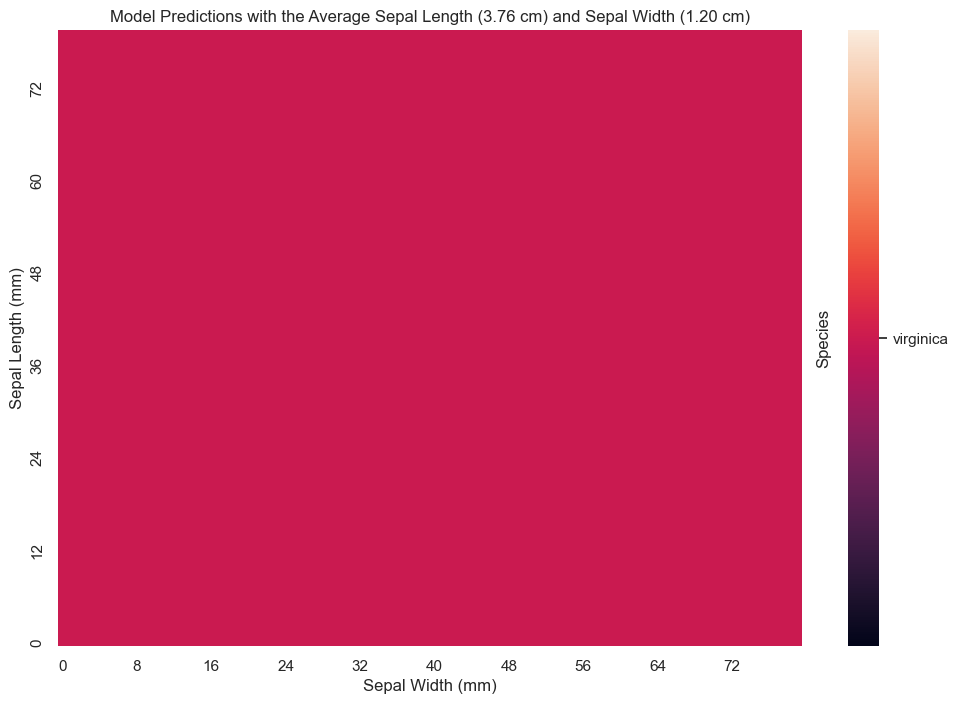

In [102]:
# Create heatmap
sns.set(rc = {'figure.figsize':(12,8)})  # figure size!
ax = sns.heatmap(PLANE, cbar_kws={'ticks': [0, 1, 2]})
ax.invert_yaxis() # to match our usual direction
ax.set(xlabel="Sepal Width (mm)", ylabel="Sepal Length (mm)")
ax.set_title(f"Model Predictions with the Average Sepal Length ({PETALLEN:.2f} cm) and Sepal Width ({PETALWID:.2f} cm)")
ax.set_xticks(ax.get_xticks()[::4])
ax.set_yticks(ax.get_yticks()[::4])


# Modify color bar
cbar = ax.collections[0].colorbar # Get color bar from heatmap
cbar.set_label('Species', labelpad=-95)  # Set the label for the color bar
cbar.set_ticklabels(['setosa', 'versicolor', 'virginica'])  # Set the tick labels

In [103]:
# Save
fig = ax.get_figure().savefig("classifier/static/img/iris_mlp_petal.png")

# Breast Cancer Models

### Getting the Data

In [58]:
cancer_data = datasets.load_breast_cancer()

# Get pre-existing feature and target data from dataset
features = cancer_data['data']
targets = cancer_data['target']
column_names = list(cancer_data['feature_names']) + ['cell type']

# Convert to pandas dataframe
cancer = pd.DataFrame(data= np.c_[cancer_data['data'], cancer_data['target']],
                     columns= column_names)

cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cell type
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [89]:
# Define feature/target data with dummies
A = cancer.to_numpy()
A = A.astype('float64')

features = A[:,0:10]  # only use the mean values
targets = A[:,30]

print(features[0:5,])
print(targets[0:5])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414e-01
  1.052e-01 2.597e-01 9.744e-02]
 [2.029e+01 1.434e+01 1.351e+02 1.297e+03 1.003e-01 1.328e-01 1.980e-01
  1.043e-01 1.809e-01 5.883e-02]]
[0. 0. 0. 0. 0.]


In [289]:
# Keep track of species index
TARGET = ['malignant','benign']   # int to str
TARGET_INDEX = {'malignant':0,'benign':1}  # str to int
FEATURES = list(cancer_data['feature_names'])
FEATURES_INDEX = {feature: index for index, feature in enumerate(FEATURES)}

## Building the KNN Model

In [91]:
# Permute data to remove dependence on order
indices = np.random.permutation(len(targets))
features = features[indices]
targets = targets[indices]

In [93]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2)


print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n" )

print(f"Held-out data... (testing data: {len(y_test)} rows)")
print(f"y_test (first few rows):\n {y_test[0:5]}") # 5 rows
print(f"X_test (first few rows):\n {X_test[0:3,:]}") # 3 rows
print()
print(f"Data used for modeling... (training data: {len(y_train)} rows)")
print(f"y_train (first few rows):\n {y_train[0:5]}")
print(f"X_train (first few rows):\n {X_train[0:3,:]}")  # 3 rows

training with 455 rows;  testing with 114 rows

Held-out data... (testing data: 114 rows)
y_test (first few rows):
 [1. 0. 0. 1. 0.]
X_test (first few rows):
 [[1.289e+01 1.312e+01 8.189e+01 5.159e+02 6.955e-02 3.729e-02 2.260e-02
  1.171e-02 1.337e-01 5.581e-02]
 [2.013e+01 2.825e+01 1.312e+02 1.261e+03 9.780e-02 1.034e-01 1.440e-01
  9.791e-02 1.752e-01 5.533e-02]
 [1.917e+01 2.480e+01 1.324e+02 1.123e+03 9.740e-02 2.458e-01 2.065e-01
  1.118e-01 2.397e-01 7.800e-02]]

Data used for modeling... (training data: 455 rows)
y_train (first few rows):
 [1. 1. 0. 1. 1.]
X_train (first few rows):
 [[9.742e+00 1.567e+01 6.150e+01 2.899e+02 9.037e-02 4.689e-02 1.103e-02
  1.407e-02 2.081e-01 6.312e-02]
 [1.096e+01 1.762e+01 7.079e+01 3.656e+02 9.687e-02 9.752e-02 5.263e-02
  2.788e-02 1.619e-01 6.408e-02]
 [1.607e+01 1.965e+01 1.041e+02 8.177e+02 9.168e-02 8.424e-02 9.769e-02
  6.638e-02 1.798e-01 5.391e-02]]


In [94]:
## Train KNN model

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Initial guess for optimal k
init_guess = 4

all_accuracies = []
best_k = init_guess
best_accuracy = 0.0 

# Cross-Validate with test data to find best k
for k in range(1,85):
    knn_cv_model = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score( knn_cv_model, X_train, y_train, cv=5 )  # cv=5 means 80/20
    this_cv_accuracy = cv_scores.mean() 

    if this_cv_accuracy > best_accuracy:
        best_accuracy = this_cv_accuracy
        best_k = k

    all_accuracies.append(this_cv_accuracy)

# Train model with best k
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train, y_train)

print(f"best_k = {best_k}   yields the highest average cv accuracy: {best_accuracy}")

best_k = 15   yields the highest average cv accuracy: 0.8901098901098902


<Axes: xlabel='k_value', ylabel='accuracy'>

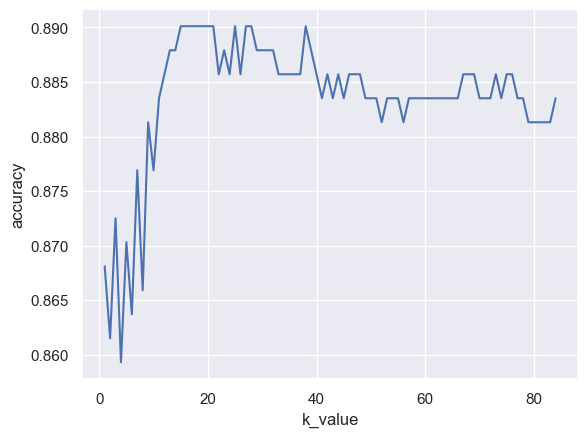

In [95]:
## Visualize Cross-Validation

# Let's create a pandas dataframe out of the above cell's data
crossvalidation_df = pd.DataFrame( {"k_value":np.asarray(range(1,84+1)),
                                    "accuracy":np.asarray(all_accuracies)}
                                    )

sns.set_theme(style="darkgrid")

# Plot the responses for different events and regions
sns.lineplot(x="k_value", y="accuracy",  #  hue="region", style="event",
             data=crossvalidation_df)

In [96]:
## Test model

predicted_labels = knn_model.predict(X_test)
actual_labels = y_test

print("Predicted labels:", predicted_labels[0:5])
print("Actual  labels  :", actual_labels[0:5])

# Overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

Predicted labels: [1. 0. 0. 1. 0.]
Actual  labels  : [1. 0. 0. 1. 0.]

Results on test set:  104 correct out of 114 total.


In [97]:
# Build FINAL model with tuned parameter k and all data
knn_model_final = KNeighborsClassifier(n_neighbors=best_k)
knn_model_final.fit(features, targets)

# Test
predicted_labels = knn_model.predict(X_test)
actual_labels = y_test

print("Predicted labels:", predicted_labels[0:5])
print("Actual  labels  :", actual_labels[0:5])

# Overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

Predicted labels: [1. 0. 0. 1. 0.]
Actual  labels  : [1. 0. 0. 1. 0.]

Results on test set:  104 correct out of 114 total.


In [99]:
# Save Model
dump(knn_model_final, 'classifier/models/cancer/knn.pkl')

['classifier/models/cancer/knn.pkl']

## Creating Plots for KNN Visualization

In [203]:
knn = load('classifier/models/cancer/knn.pkl')

### Pairwise Heatmaps

The visualization we will use is like pairwise plots, but using heatmaps. Not all planes will be visualized, as 5 features will be on the y-axis and 5 on the x-axis.

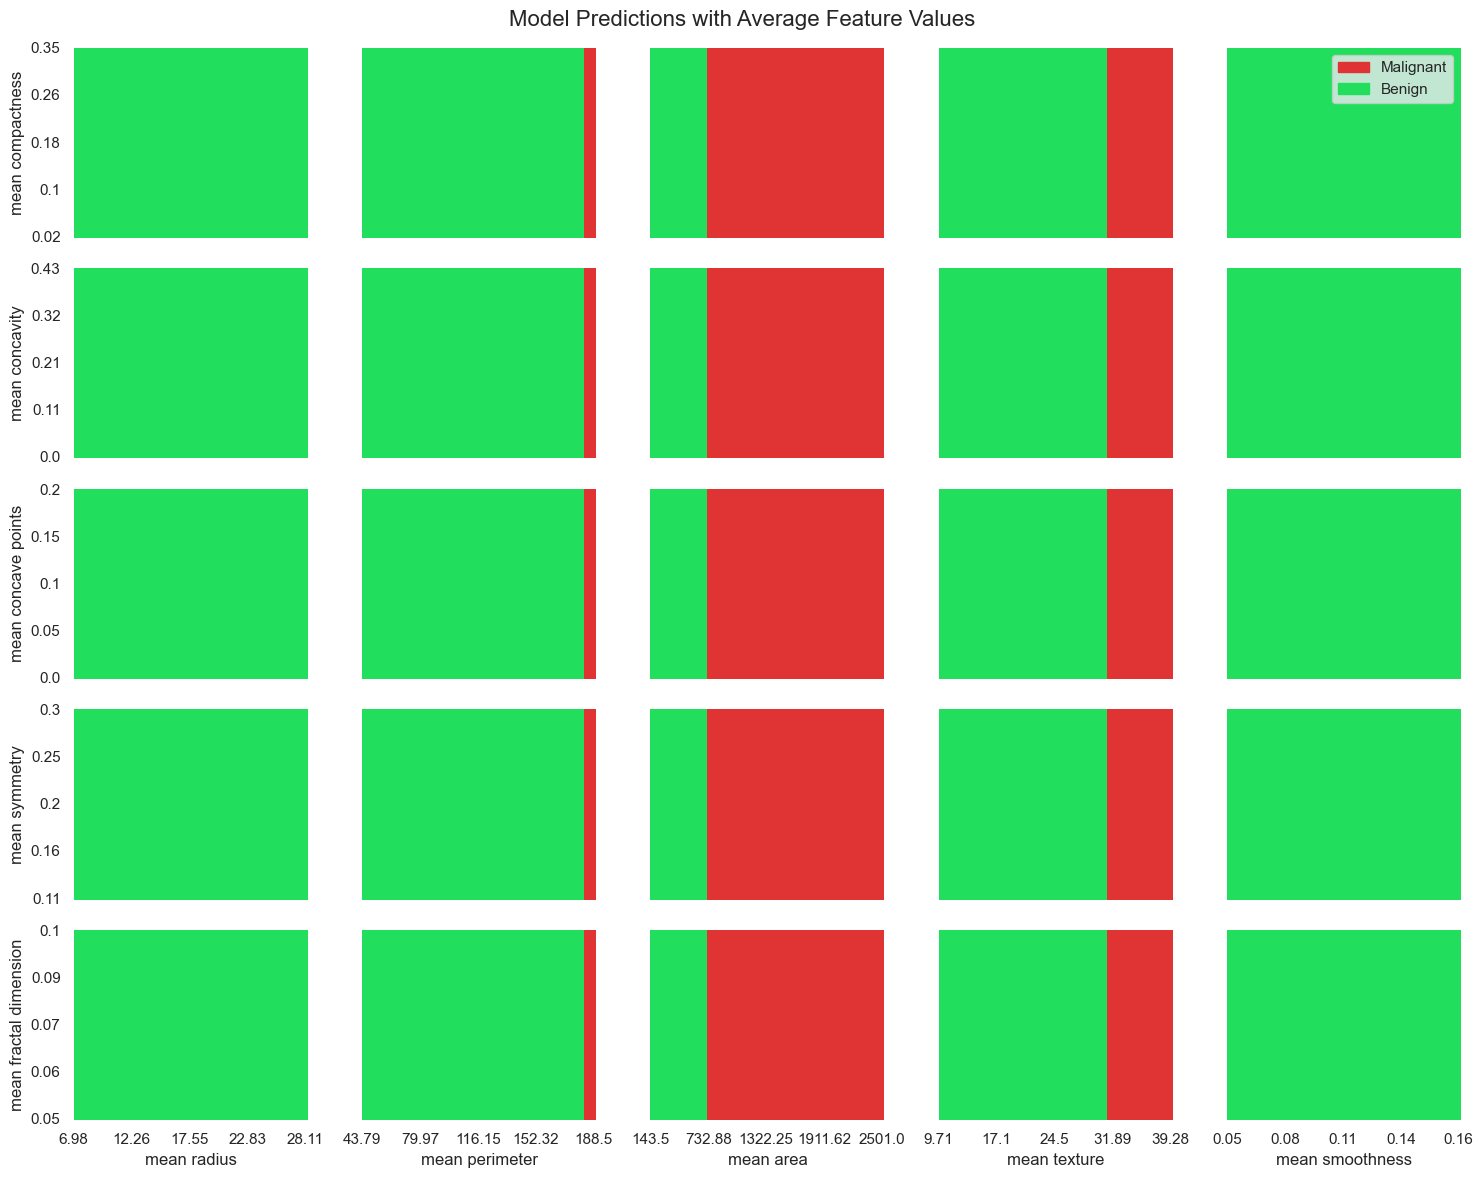

In [482]:
# Plot for average values
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# Define axes features
x_features = ['mean radius', 'mean perimeter', 'mean area', 'mean texture', 'mean smoothness']
y_features = ['mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension']

# Find indices of the features
x_indices = [list(FEATURES).index(f) for f in x_features]
y_indices = [list(FEATURES).index(f) for f in y_features]

# Generate pairwise plots
nrows, ncols = len(y_features), len(x_features)
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 12), sharex='col', sharey='row')
grid_resolution = 100

# Create a grid of plots
for i, y_idx in enumerate(y_indices):
    for j, x_idx in enumerate(x_indices):
        
        # Get feature ranges
        x_min, x_max = features[:, x_idx].min(), features[:, x_idx].max()
        y_min, y_max = features[:, y_idx].min(), features[:, y_idx].max()
        x_range = np.linspace(x_min, x_max, grid_resolution)
        y_range = np.linspace(y_min, y_max, grid_resolution)
        
        # Generate grid for the selected features
        grid_x, grid_y = np.meshgrid(x_range, y_range)
        grid_points = np.c_[grid_x.ravel(), grid_y.ravel()]

        # Create a synthetic dataset with other features held constant
        X_const = np.full((grid_points.shape[0], features.shape[1]), features.mean(axis=0))
        X_const[:, x_idx] = grid_points[:, 0]
        X_const[:, y_idx] = grid_points[:, 1]

        # Predict on the grid and reshape
        Z = knn.predict(X_const).reshape(grid_resolution, grid_resolution)
    
        # Plot heatmap
        ax = axes[i, j]
        sns.heatmap(Z, cmap=["#e03434", "#21de5d"], ax=ax, cbar=False, vmin=0, vmax=1)

        # Modify axes
        ax.invert_yaxis()

        # Set tick labels to actual feature ranges (instead of grid indices)
        x_ticks = np.linspace(0, len(x_range) - 1, 5)
        x_ticklabels = np.linspace(x_min, x_max, 5).round(2)
        y_ticks = np.linspace(0, len(y_range) - 1, 5)
        y_ticklabels = np.linspace(y_min, y_max, 5).round(2)
        ax.set_xticks(x_ticks)
        ax.set_xticklabels(x_ticklabels, rotation=0)
        ax.set_yticks(y_ticks)
        ax.set_yticklabels(y_ticklabels, rotation=0)

        # Set axis titles
        if i == nrows - 1:
            ax.set_xlabel(x_features[j])
        if j == 0:
            ax.set_ylabel(y_features[i])

        # Create legend (on top right subplot)
        if i == 0 and j == ncols - 1:
            legend_labels = [Patch(color="#e03434", label="Malignant"),
                            Patch(color="#21de5d", label="Benign")]
            axes[0, nrows-1].legend(handles=legend_labels, loc="upper right")

plt.suptitle("Model Predictions with Average Feature Values", fontsize=16)
plt.tight_layout()
plt.show()

In [483]:
# Save
fig = ax.get_figure().savefig("classifier/static/img/cancer_knn.png")

## Training the DTree Model

In [ ]:
# Permute data to remove dependence on order
indices = np.random.permutation(len(targets))
features = features[indices]
targets = targets[indices]

In [ ]:
from sklearn import tree
BEST_DEPTH = 3 # from previous cross validation

dtree = tree.DecisionTreeClassifier(max_depth=BEST_DEPTH)
dtree.fit(features, targets)

DecisionTreeClassifier(max_depth=3)

In [ ]:
# Feature importances
print(dtree.feature_importances_)

[0.         0.         0.05393633 0.94606367]


In [ ]:
# Save model
dump(dtree, 'classifier/models/iris/dtree.pkl')

['classifier/models/iris/dtree.pkl']

### Visualizing the dtree model

In [ ]:
dtree = load('classifier/models/iris/dtree.pkl')

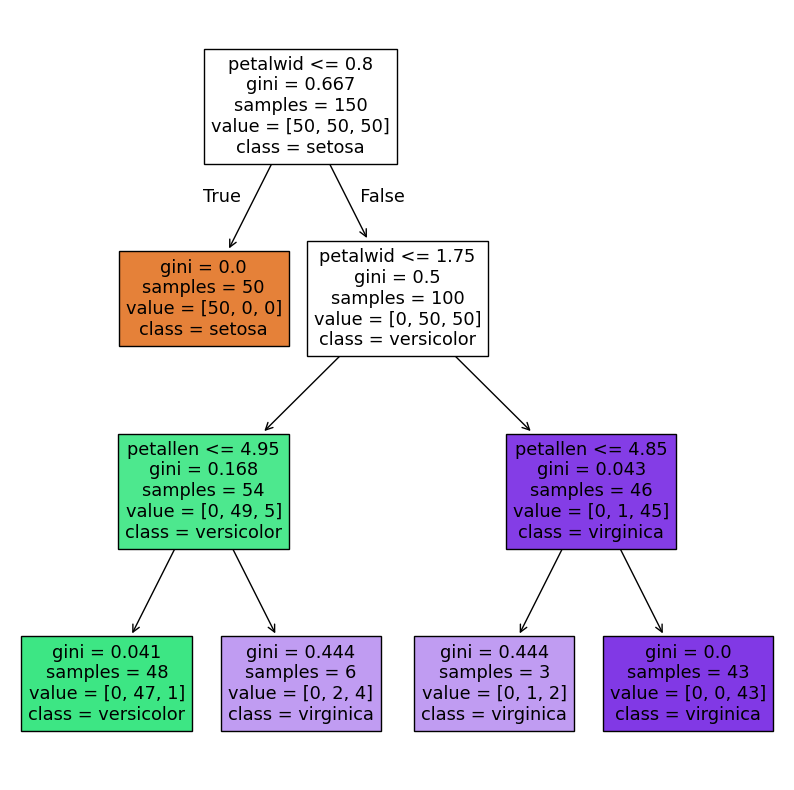

In [ ]:
fig = plt.figure(figsize=(10,10))
tree_plot = tree.plot_tree(dtree, 
                   feature_names=FEATURES,
                   class_names=SPECIES,
                   filled=True)

In [ ]:
# Save figure
fig.savefig("classifier/static/img/iris_dtree.png", bbox_inches='tight')